## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

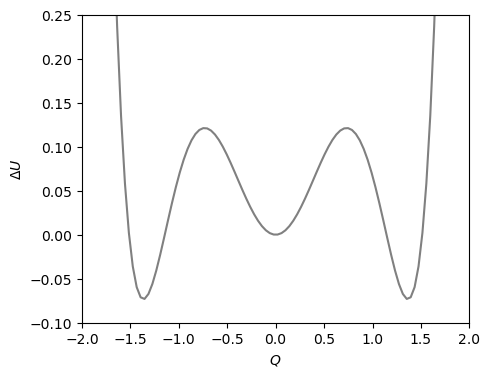

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

In [ ]:
# pseudocode for python
# import needed packages
# define constants
# derive system of equations (analytic or sympy, or both for comparison)
# define first-order system of equations as a custom function
# initialize positions and velocities
# solve with differential eqaution solver
# extract solution
# plot trajectories
# embed code in ipywidgets environment to explore physics and code

In [ ]:
# pseudocode for python

# import needed packages
    #scypi,numpty, matlab: exc

# define constants
    #(k=1,d=2.4,fee=1,m=1)
#secand derivitive

# derive system of equations (analytic or sympy, or both for comparison)

#find miniums 

# define first-order system of equations as a custom function
    #input:  positions\volocitys 
    #output: time derivitves

# initialize positions and velocities

# solve with differential eqaution solver
    #scypie solver

# extract solution


# plot trajectories


# embed code in ipywidgets environment to explore physics and code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def rk2_new_oscillator(m, Q0, v0, t_end, dt, K=1, D=1, Phi=1):
    # Potential constants
    # K, D, Phi are now arguments of the function
    
    t_vals = np.arange(0, t_end, dt)
    Q_vals = np.zeros(len(t_vals))
    v_vals = np.zeros(len(t_vals))
    Q_vals[0] = Q0
    v_vals[0] = v0
    
    for i in range(1, len(t_vals)):
        # First slopes (k1)
        k1_Q = v_vals[i-1]
        
        # Force derived from U(Q)
        k1_v = (-K * Q_vals[i-1] + D * Q_vals[i-1]**3 - Phi * Q_vals[i-1]**5) / m
        
        # Intermediate estimates
        Q_mid = Q_vals[i-1] + k1_Q * dt / 2
        v_mid = v_vals[i-1] + k1_v * dt / 2
        
        # Second slopes (k2)
        k2_Q = v_mid
        
        # Force derived from U(Q)
        k2_v = (-K * Q_mid + D * Q_mid**3 - Phi * Q_mid**5) / m
        
        # Update the values
        Q_vals[i] = Q_vals[i-1] + k2_Q * dt
        v_vals[i] = v_vals[i-1] + k2_v * dt
    
    return t_vals, Q_vals, v_vals

def plot_rk2_new_oscillator(m=1, Q0=1, v0=0, t_end=10, dt=0.1, K=1, D=1, Phi=1):
    t_vals, rk2_Q_vals, rk2_v_vals = rk2_new_oscillator(m, Q0, v0, t_end, dt, K, D, Phi)
    
    plt.plot(t_vals, rk2_Q_vals, label="RK2 Method - Position")
    plt.plot(t_vals, rk2_v_vals, label="RK2 Method - Velocity", linestyle="dashed")
    
    plt.xlabel('Time')
    plt.ylabel('Q(t), v(t)')
    plt.legend()
    plt.title(f"New Oscillator Simulation (dt={dt})")
    plt.show()

interact(plot_rk2_new_oscillator,
         m=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='$m$'),  
         Q0=FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description='$Q(0)$'), 
         v0=FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='$\\dot{Q}(0)$'), 
         t_end=FloatSlider(value=2.0, min=1.0, max=20.0, step=0.1, description='$t_{end}$'), 
         dt=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='$dt$'),
         K=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='$K$'),
         D=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='$D$'),
         Phi=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='$\\Phi$')
        )


interactive(children=(FloatSlider(value=1.0, description='$m$', max=10.0, min=0.1), FloatSlider(value=1.0, des…

<function __main__.plot_rk2_new_oscillator(m=1, Q0=1, v0=0, t_end=10, dt=0.1, K=1, D=1, Phi=1)>

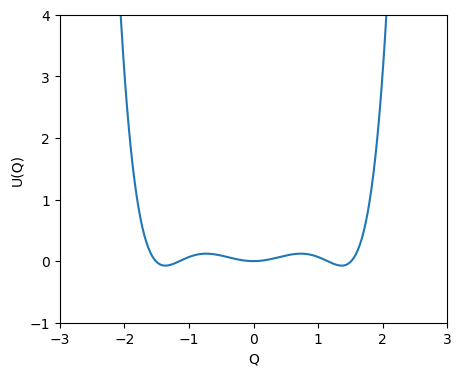

Minimum found near x0: [1.3650366]
Minimum found near x1: [-1.36503662]
Minimum found near x1: [0.]


In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the potential energy function and its derivative
def U(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6


# Plot the potential energy function
Q_vals = np.linspace(-3, 3, 400)
U_vals = U(Q_vals)

plt.figure(figsize=(5, 4))
plt.plot(Q_vals, U_vals)
plt.xlabel('Q')
plt.ylabel('U(Q)')
plt.xlim(-3,3)
plt.ylim(-1,4)
plt.show()

# Minimization (finding the local minimum)
# Minimization (finding the local minimum)
x0=1.2
x1=-1.2
x2=0
min_result = minimize(U, x0)
min_result1 = minimize(U, x1)
min_result2 = minimize(U, x2)

print("Minimum found near x0:", min_result.x)
print("Minimum found near x1:", min_result1.x)
print("Minimum found near x1:", min_result2.x)

the plot of the general equasion shows two miniums. as well as one in the center at 0. there are two sadel points. for the periodic look as it moves on it seems to ocilate more within the smalller wells becore moving to some of the larger ones. before moving threw the wells allthe way to the other side of the ocilation. this is likly dew to it gaining energy within one well before gaining enough energy to make it all the way threw. than becoming un calculateable. 